In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

def gap():
    print('---'*20)

In [2]:
df_train = pd.read_csv('/Users/xiaokunhuang/hxk/资料/阿里巴巴/入职前学习/学习资料/kaggle/Titanic/data/train.csv')

In [3]:
df_test = pd.read_csv('/Users/xiaokunhuang/hxk/资料/阿里巴巴/入职前学习/学习资料/kaggle/Titanic/data/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()
print('----'*20)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 no

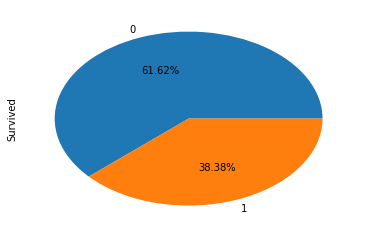

In [6]:
df_train['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

In [7]:
# 处理Embarked字段 
df_train.Embarked.isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [8]:
# 采用众数进行填充
df_train.Embarked.dropna().mode().values

array(['S'], dtype=object)

In [9]:
df_train.Embarked[df_train.Embarked.isnull()] = df_train.Embarked.dropna().mode().values

In [10]:
df_train.Embarked.isnull().value_counts()

False    891
Name: Embarked, dtype: int64

In [11]:
#处理cabin 因缺失太多 采用一个字段代表舱位 cabin字段挺重要的 
df_train.Cabin = df_train.Cabin.fillna('U0')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
# 处理年龄 年龄也是一个很重要的因素 采用回来来预测年龄
age_test = df_train[['Pclass','Survived','Age','SibSp','Parch','Fare']]

In [13]:
age_x_train = age_test[age_test['Age'].notnull()].drop(['Age'],axis=1)
age_y_train = age_test[age_test['Age'].notnull()]['Age']
age_x_test = age_test[age_test['Age'].isnull()].drop(['Age'],axis=1)
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000, n_jobs=2)
rfr.fit(age_x_train,age_y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=2,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [14]:
predit_age = rfr.predict(age_x_test)
df_train.loc[df_train.Age.isnull(),['Age']] = predit_age

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [16]:
# 分析数据和最终结果的关系
#1.Sex
df_train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

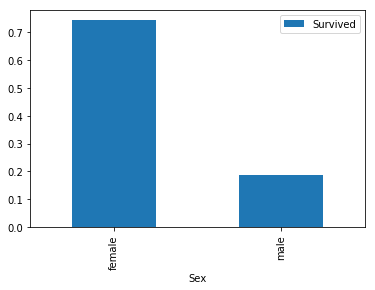

In [17]:
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
#可以看到女性的生存率很高

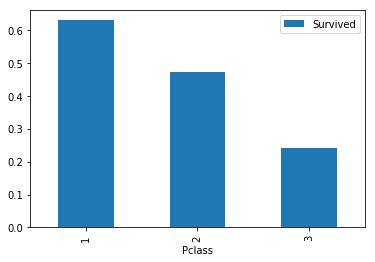

In [18]:
# Pclass
df_train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()
# 可以看到 1等舱的生存率高 女性优先

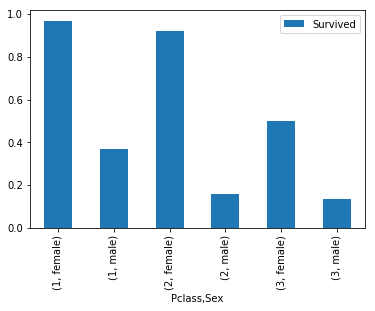

In [19]:
df_train[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

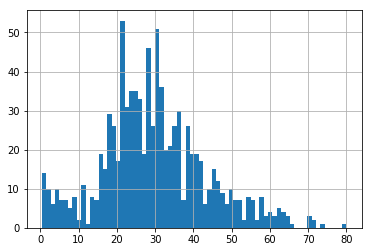

In [20]:
df_train['Age'].hist( bins=70)

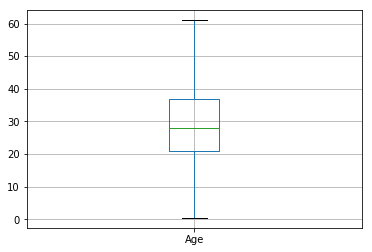

In [21]:
df_train.boxplot(column='Age', showfliers=False)

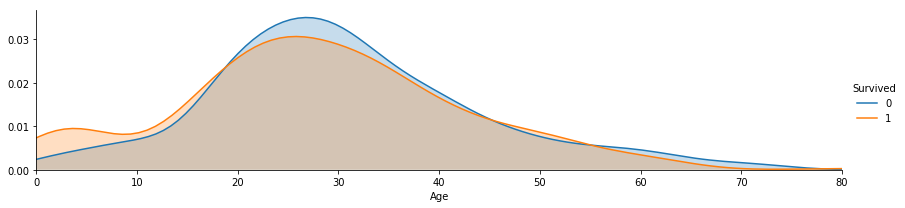

In [22]:
import seaborn as sns
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()

In [23]:
df_train.Age.describe()

count    891.000000
mean      29.664736
std       13.737733
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
# 年龄数据离散化 可以看到 年龄越小生存率越高
age_bins =  [0, 12, 18, 65, 100]
df_train['Age_group'] = pd.cut(df_train.Age,age_bins)
age_static = df_train.groupby('Age_group')[['Survived']].mean()
age_static

,Survived
Age_group,
"(0, 12]",0.506173
"(12, 18]",0.466667
"(18, 65]",0.364512
"(65, 100]",0.125000


In [25]:
# 姓名分析 称呼的分析可以看到和性别对应
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


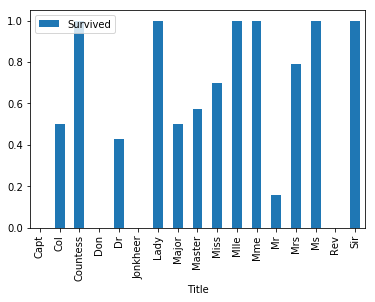

In [26]:
# 不同的称呼对于生存率的关系
df_train[['Title','Survived']].groupby(['Title']).mean().plot.bar()

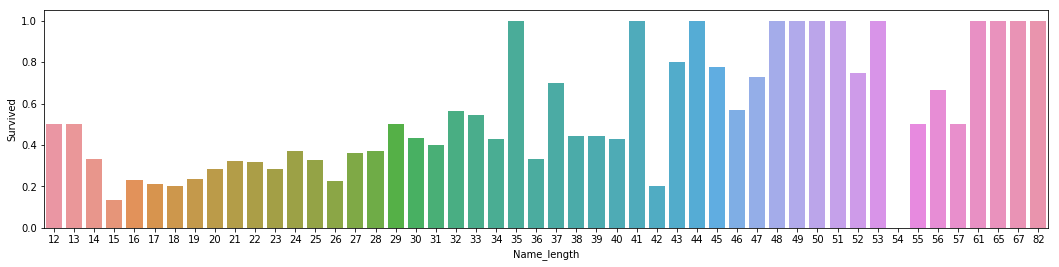

In [27]:
# 名字长度和生存率的关系 好像有点 不过emmmmm...
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
df_train['Name_length'] = df_train['Name'].apply(len)
name_length = df_train[['Name_length','Survived']].groupby(['Name_length'],as_index=False).mean()
sns.barplot(x='Name_length', y='Survived', data=name_length)

In [28]:
# 有无兄弟姐妹
df_train[['SibSp','Survived']].groupby(['Survived']).mean()

,SibSp
Survived,
0,0.553734
1,0.473684


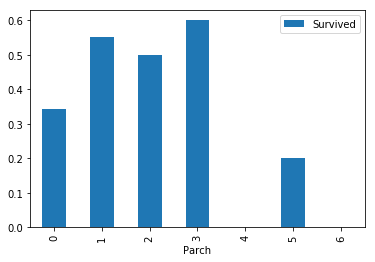

In [29]:
# 有无父母子女 
df_train[['Parch','Survived']].groupby(['Parch']).mean().plot.bar()

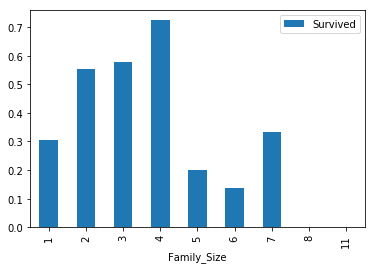

In [30]:
# 是否有亲友与存活率的关系
df_train['Family_Size'] = df_train['Parch'] + df_train['SibSp'] + 1
df_train[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot.bar()

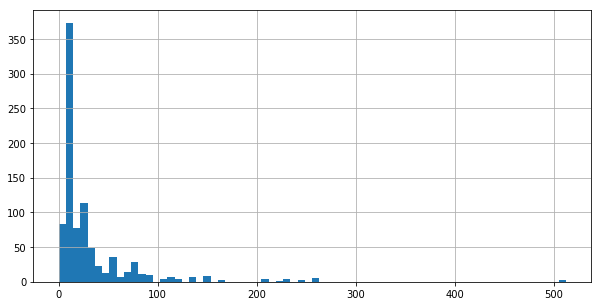

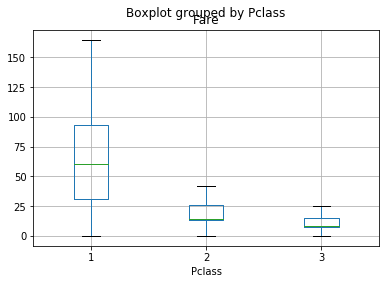

In [31]:
# 票价关系
plt.figure(figsize=(10,5))
df_train['Fare'].hist(bins = 70)

df_train.boxplot(column='Fare', by='Pclass', showfliers=False)
plt.show()

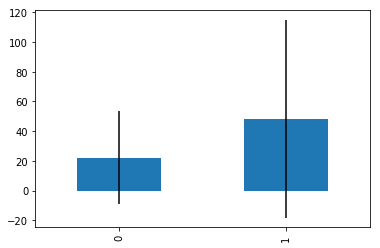

In [32]:
# 生还者和遇难者平均票价对比 可以看到票价贵生还几率还是高的
fare_not_survived = df_train['Fare'][df_train['Survived'] == 0]
fare_survived = df_train['Fare'][df_train['Survived'] == 1]

average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])
average_fare.plot(yerr=std_fare, kind='bar', legend=False)

plt.show()

Text(0.5,1,'Embarked and Survived')

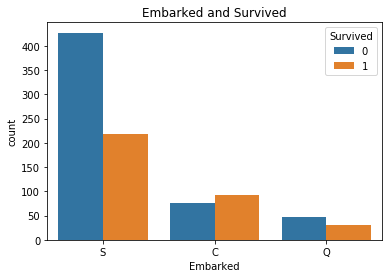

In [33]:
# 港口存活
sns.countplot('Embarked', hue='Survived', data=df_train)
plt.title('Embarked and Survived')

In [34]:
# 变量转换
embark_dummies = pd.get_dummies(df_train['Embarked'])
df_train = pd.concat([df_train,embark_dummies],axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Title,Name_length,Family_Size,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,"(18, 65]",Mr,23,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(18, 65]",Mrs,51,2,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,"(18, 65]",Miss,22,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(18, 65]",Mrs,44,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,"(18, 65]",Mr,24,1,0,0,1


In [35]:
import re
df_train['CabinLetter'] = df_train['Cabin'].map( lambda x : re.compile("([a-zA-Z]+)").search(x).group())
df_train.CabinLetter = pd.factorize(df_train['CabinLetter'])[0]
df_train.CabinLetter.head()

0    0
1    1
2    0
3    1
4    0
Name: CabinLetter, dtype: int64

In [36]:
# age正则化处理
from sklearn import  preprocessing
scaler = preprocessing.StandardScaler()
df_train['Age_scaled'] = scaler.fit_transform(df_train['Age'].values.reshape(-1, 1))

In [37]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Age_group,Title,Name_length,Family_Size,C,Q,S,CabinLetter,Age_scaled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,"(18, 65]",Mr,23,2,0,0,1,0,-0.558246
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,"(18, 65]",Mrs,51,2,1,0,0,1,0.607083
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,"(18, 65]",Miss,22,1,0,0,1,0,-0.266914
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,"(18, 65]",Mrs,44,2,0,0,1,1,0.388584
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,"(18, 65]",Mr,24,1,0,0,1,0,0.388584


In [38]:
df_train['Fare_bin'] = pd.qcut(df_train['Fare'], 5)
df_train['Fare_bin'].head()

0      (-0.001, 7.854]
1    (39.688, 512.329]
2        (7.854, 10.5]
3    (39.688, 512.329]
4        (7.854, 10.5]
Name: Fare_bin, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [39]:
df_train.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                               U0
Embarked                             S
Age_group                     (18, 65]
Title                               Mr
Name_length                         23
Family_Size                          2
C                                    0
Q                                    0
S                                    1
CabinLetter                          0
Age_scaled                   -0.558246
Fare_bin               (-0.001, 7.854]
Name: 0, dtype: object

In [40]:
# 特征工程
train_df_org = pd.read_csv('/Users/xiaokunhuang/hxk/资料/阿里巴巴/入职前学习/学习资料/kaggle/Titanic/data/train.csv')
test_df_org = pd.read_csv('/Users/xiaokunhuang/hxk/资料/阿里巴巴/入职前学习/学习资料/kaggle/Titanic/data/test.csv')
test_df_org['Survived'] = 0
combined_train_test = train_df_org.append(test_df_org)
PassengerId = test_df_org['PassengerId']

In [41]:
combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0], inplace=True)
combined_train_test['Embarked'] = pd.factorize(combined_train_test['Embarked'])[0]

In [42]:
combined_train_test['Sex'] = pd.factorize(combined_train_test['Sex'])[0]

In [43]:
combined_train_test['Title'] = combined_train_test['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))

combined_train_test['Title'] = combined_train_test['Title'].map(title_Dict)

In [44]:
combined_train_test['Title'] = pd.factorize(combined_train_test['Title'])[0]
combined_train_test['Name_length'] = combined_train_test['Name'].apply(len)

In [47]:
combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform(np.mean))
combined_train_test['Group_Ticket'] = combined_train_test['Fare'].groupby(by=combined_train_test['Ticket']).transform('count')
combined_train_test['Fare'] = combined_train_test['Fare'] / combined_train_test['Group_Ticket']
combined_train_test.drop(['Group_Ticket'], axis=1, inplace=True)

In [48]:
combined_train_test['Fare_bin'] = pd.qcut(combined_train_test['Fare'], 5)
combined_train_test['Fare_bin_id'] = pd.factorize(combined_train_test['Fare_bin'])[0]

In [49]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Name_length,Fare_bin,Fare_bin_id
0,22.0,NaN,0,7.25000,"Braund, Mr. Owen Harris",0,1,3,0,1,0,A/5 21171,0,23,"(7.229, 7.896]",0
1,38.0,C85,1,35.64165,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1,PC 17599,1,51,"(26.277, 128.082]",1
2,26.0,NaN,0,7.92500,"Heikkinen, Miss. Laina",0,3,3,1,0,1,STON/O2. 3101282,2,22,"(7.896, 10.5]",2
3,35.0,C123,0,26.55000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1,113803,1,44,"(26.277, 128.082]",1
4,35.0,NaN,0,8.05000,"Allen, Mr. William Henry",0,5,3,0,0,0,373450,0,24,"(7.896, 10.5]",2


In [50]:
combined_train_test['Pclass'] = pd.factorize(combined_train_test['Pclass'])[0]
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Name_length,Fare_bin,Fare_bin_id
0,22.0,NaN,0,7.25000,"Braund, Mr. Owen Harris",0,1,0,0,1,0,A/5 21171,0,23,"(7.229, 7.896]",0
1,38.0,C85,1,35.64165,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1,PC 17599,1,51,"(26.277, 128.082]",1
2,26.0,NaN,0,7.92500,"Heikkinen, Miss. Laina",0,3,0,1,0,1,STON/O2. 3101282,2,22,"(7.896, 10.5]",2
3,35.0,C123,0,26.55000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1,113803,1,44,"(26.277, 128.082]",1
4,35.0,NaN,0,8.05000,"Allen, Mr. William Henry",0,5,0,0,0,0,373450,0,24,"(7.896, 10.5]",2


In [51]:
def family_size_category(family_size):
    if family_size <= 1:
        return 'Single'
    elif family_size <= 4:
        return 'Small_Family'
    else:
        return 'Large_Family'

combined_train_test['Family_Size'] = combined_train_test['Parch'] + combined_train_test['SibSp'] + 1
combined_train_test['Family_Size_Category'] = combined_train_test['Family_Size'].map(family_size_category)

le_family = preprocessing.LabelEncoder()
le_family.fit(np.array(['Single', 'Small_Family', 'Large_Family']))
combined_train_test['Family_Size_Category'] = le_family.transform(combined_train_test['Family_Size_Category'])

family_size_dummies_df = pd.get_dummies(combined_train_test['Family_Size_Category'],
                                     prefix=combined_train_test[['Family_Size_Category']].columns[0])
combined_train_test = pd.concat([combined_train_test, family_size_dummies_df], axis=1)

In [52]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Title,Name_length,Fare_bin,Fare_bin_id,Family_Size,Family_Size_Category,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2
0,22.0,NaN,0,7.25000,"Braund, Mr. Owen Harris",0,1,0,0,1,...,A/5 21171,0,23,"(7.229, 7.896]",0,2,2,0,0,1
1,38.0,C85,1,35.64165,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,PC 17599,1,51,"(26.277, 128.082]",1,2,2,0,0,1
2,26.0,NaN,0,7.92500,"Heikkinen, Miss. Laina",0,3,0,1,0,...,STON/O2. 3101282,2,22,"(7.896, 10.5]",2,1,1,0,1,0
3,35.0,C123,0,26.55000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,113803,1,44,"(26.277, 128.082]",1,2,2,0,0,1
4,35.0,NaN,0,8.05000,"Allen, Mr. William Henry",0,5,0,0,0,...,373450,0,24,"(7.896, 10.5]",2,1,1,0,1,0


In [53]:
missing_age_df = pd.DataFrame(combined_train_test[
 ['Age', 'Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass']])

missing_age_train = missing_age_df[missing_age_df['Age'].notnull()]
missing_age_test = missing_age_df[missing_age_df['Age'].isnull()]
missing_age_test.head()

,Age,Embarked,Sex,Title,Name_length,Family_Size,Family_Size_Category,Fare,Fare_bin_id,Pclass
5,NaN,2,0,0,16,1,1,8.4583,2,0
17,NaN,0,0,0,28,1,1,13.0000,3,2
19,NaN,1,1,1,23,1,1,7.2250,4,0
26,NaN,1,0,0,23,1,1,7.2250,4,0
28,NaN,2,1,2,29,1,1,7.8792,0,0


In [54]:
from sklearn import ensemble
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

def fill_missing_age(missing_age_train, missing_age_test):
    missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
    missing_age_Y_train = missing_age_train['Age']
    missing_age_X_test = missing_age_test.drop(['Age'], axis=1)

    # model 1  gbm
    gbm_reg = GradientBoostingRegressor(random_state=42)
    gbm_reg_param_grid = {'n_estimators': [2000], 'max_depth': [4], 'learning_rate': [0.01], 'max_features': [3]}
    gbm_reg_grid = model_selection.GridSearchCV(gbm_reg, gbm_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    gbm_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print('Age feature Best GB Params:' + str(gbm_reg_grid.best_params_))
    print('Age feature Best GB Score:' + str(gbm_reg_grid.best_score_))
    print('GB Train Error for "Age" Feature Regressor:' + str(gbm_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_GB'] = gbm_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_GB'][:4])
    
    # model 2 rf
    rf_reg = RandomForestRegressor()
    rf_reg_param_grid = {'n_estimators': [200], 'max_depth': [5], 'random_state': [0]}
    rf_reg_grid = model_selection.GridSearchCV(rf_reg, rf_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    rf_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print('Age feature Best RF Params:' + str(rf_reg_grid.best_params_))
    print('Age feature Best RF Score:' + str(rf_reg_grid.best_score_))
    print('RF Train Error for "Age" Feature Regressor' + str(rf_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_RF'] = rf_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_RF'][:4])

    # two models merge
    print('shape1', missing_age_test['Age'].shape, missing_age_test[['Age_GB', 'Age_RF']].mode(axis=1).shape)
    # missing_age_test['Age'] = missing_age_test[['Age_GB', 'Age_LR']].mode(axis=1)

    missing_age_test.loc[:, 'Age'] = np.mean([missing_age_test['Age_GB'], missing_age_test['Age_RF']])
    print(missing_age_test['Age'][:4])

    missing_age_test.drop(['Age_GB', 'Age_RF'], axis=1, inplace=True)

    return missing_age_test

In [55]:
combined_train_test.loc[(combined_train_test.Age.isnull()), 'Age'] = fill_missing_age(missing_age_train, missing_age_test)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:    1.7s finished


Age feature Best GB Params:{'learning_rate': 0.01, 'max_depth': 4, 'max_features': 3, 'n_estimators': 2000}
Age feature Best GB Score:-130.2956775989383
GB Train Error for "Age" Feature Regressor:-64.65669617233556
5     35.773942
17    31.489153
19    34.113840
26    28.621281
Name: Age_GB, dtype: float64
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:    0.9s finished


Age feature Best RF Params:{'max_depth': 5, 'n_estimators': 200, 'random_state': 0}
Age feature Best RF Score:-119.09495605170706
RF Train Error for "Age" Feature Regressor-96.06031484477619
5     33.459421
17    33.076798
19    34.855942
26    28.146718
Name: Age_RF, dtype: float64
shape1 (263,) (263, 2)
5     30.000675
17    30.000675
19    30.000675
26    30.000675
Name: Age, dtype: float64


In [56]:
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket'].str.split().str[0]
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket_Letter'].apply(lambda x: 'U0' if x.isnumeric() else x)
combined_train_test['Ticket_Letter'] = pd.factorize(combined_train_test['Ticket_Letter'])[0]

In [57]:
combined_train_test.loc[combined_train_test.Cabin.isnull(), 'Cabin'] = 'U0'
combined_train_test['Cabin'] = combined_train_test['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)

In [58]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Title,Name_length,Fare_bin,Fare_bin_id,Family_Size,Family_Size_Category,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2,Ticket_Letter
0,22.0,0,0,7.25000,"Braund, Mr. Owen Harris",0,1,0,0,1,...,0,23,"(7.229, 7.896]",0,2,2,0,0,1,0
1,38.0,1,1,35.64165,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,1,51,"(26.277, 128.082]",1,2,2,0,0,1,1
2,26.0,0,0,7.92500,"Heikkinen, Miss. Laina",0,3,0,1,0,...,2,22,"(7.896, 10.5]",2,1,1,0,1,0,2
3,35.0,1,0,26.55000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,1,44,"(26.277, 128.082]",1,2,2,0,0,1,3
4,35.0,0,0,8.05000,"Allen, Mr. William Henry",0,5,0,0,0,...,0,24,"(7.896, 10.5]",2,1,1,0,1,0,3


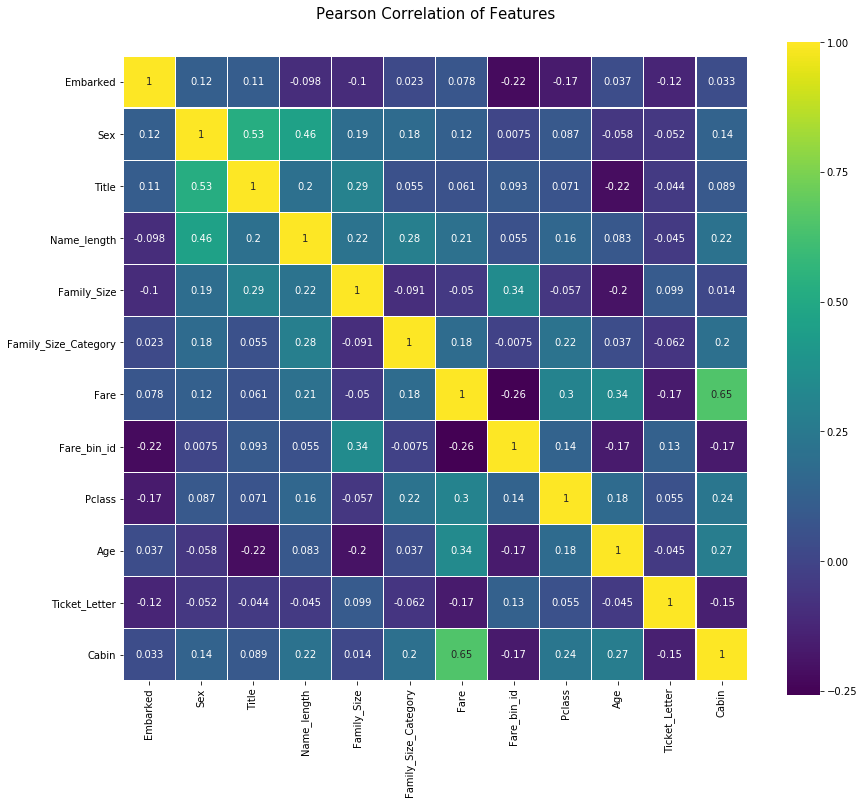

In [59]:
Correlation = pd.DataFrame(combined_train_test[
 ['Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass',  'Age', 'Ticket_Letter', 'Cabin']])
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [60]:
combined_train_test.iloc[1,:]

Age                                                                      38
Cabin                                                                     1
Embarked                                                                  1
Fare                                                                35.6416
Name                      Cumings, Mrs. John Bradley (Florence Briggs Th...
Parch                                                                     0
PassengerId                                                               2
Pclass                                                                    1
Sex                                                                       1
SibSp                                                                     1
Survived                                                                  1
Ticket                                                             PC 17599
Title                                                                     1
Name_length 

In [61]:
scale_age_fare = preprocessing.StandardScaler().fit(combined_train_test[['Age','Fare', 'Name_length']])
combined_train_test[['Age','Fare', 'Name_length']] = scale_age_fare.transform(combined_train_test[['Age','Fare', 'Name_length']])

In [62]:
combined_train_test.iloc[1,:]

Age                                                                0.628562
Cabin                                                                     1
Embarked                                                                  1
Fare                                                                1.54187
Name                      Cumings, Mrs. John Bradley (Florence Briggs Th...
Parch                                                                     0
PassengerId                                                               2
Pclass                                                                    1
Sex                                                                       1
SibSp                                                                     1
Survived                                                                  1
Ticket                                                             PC 17599
Title                                                                     1
Name_length 

In [63]:
combined_data_backup = combined_train_test
combined_train_test.drop(['PassengerId','Name', 'Title', 'Fare_bin','Family_Size_Category', 'Ticket'],axis=1,inplace=True)

In [65]:
combined_train_test.head()
train_data = combined_train_test[:891]
test_data = combined_train_test[891:]

titanic_train_data_X = train_data.drop(['Survived'],axis=1)
titanic_train_data_Y = train_data['Survived']
titanic_test_data_X = test_data.drop(['Survived'],axis=1)

In [66]:
titanic_train_data_X.head()

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Name_length,Fare_bin_id,Family_Size,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2,Ticket_Letter
0,-0.613832,0,0,-0.554177,0,0,0,1,-0.434672,0,2,0,0,1,0
1,0.628562,1,1,1.541869,0,1,1,1,2.511806,1,2,0,0,1,1
2,-0.303234,0,0,-0.504344,0,0,1,0,-0.539904,2,1,0,1,0,2
3,0.395613,1,0,0.870667,0,1,1,1,1.775186,1,2,0,0,1,3
4,0.395613,0,0,-0.495116,0,0,0,0,-0.329441,2,1,0,1,0,3


In [67]:
# 利用不同模型对特征进行筛选
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


rf_est = RandomForestClassifier(random_state=0)
rf_param_grid = {'n_estimators': [100,200,500], 'min_samples_split': [2, 3], 'max_depth': [10,20]}
rf_grid = model_selection.GridSearchCV(rf_est, rf_param_grid, n_jobs=25, cv=5, verbose=1)
rf_grid.fit(titanic_train_data_X, titanic_train_data_Y)
print('Top N Features Best RF Params:' + str(rf_grid.best_params_))
print('Top N Features Best RF Score:' + str(rf_grid.best_score_))
print('Top N Features RF Train Score:' + str(rf_grid.score(titanic_train_data_X, titanic_train_data_Y)))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=25)]: Done  60 out of  60 | elapsed:    6.0s finished


Top N Features Best RF Params:{'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 200}
Top N Features Best RF Score:0.8305274971941639
Top N Features RF Train Score:0.9854096520763187


In [73]:
feature_imp_sorted_rf = pd.DataFrame({'feature': list(titanic_train_data_X),
                                          'importance': rf_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
feature_imp_sorted_rf

,feature,importance
6,Sex,0.239055
8,Name_length,0.159770
0,Age,0.154890
3,Fare,0.149924
5,Pclass,0.049660
14,Ticket_Letter,0.039971
1,Cabin,0.037861
9,Fare_bin_id,0.036318
2,Embarked,0.029387
10,Family_Size,0.028573


In [79]:
# 去掉最后几个影响很小特征
titanic_train_data_X.drop(['Family_Size_Category_0','Family_Size_Category_1','SibSp','Parch'],axis=1,inplace=True)
titanic_test_data_X.drop(['Family_Size_Category_0','Family_Size_Category_1','SibSp','Parch'],axis=1,inplace=True)

In [81]:
from sklearn.model_selection import KFold

# Some useful parameters which will come in handy later on
ntrain = titanic_train_data_X.shape[0]
ntest = titanic_test_data_X.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 7 # set folds for out-of-fold prediction
kf = KFold(n_splits = NFOLDS, random_state=SEED, shuffle=False)

def get_out_fold(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

rf = RandomForestClassifier(n_estimators=500, warm_start=True, max_features='sqrt',max_depth=6, 
                            min_samples_split=3, min_samples_leaf=2, n_jobs=-1, verbose=0)

ada = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)

et = ExtraTreesClassifier(n_estimators=500, n_jobs=-1, max_depth=8, min_samples_leaf=2, verbose=0)

gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.008, min_samples_split=3, min_samples_leaf=2, max_depth=5, verbose=0)

dt = DecisionTreeClassifier(max_depth=8)

knn = KNeighborsClassifier(n_neighbors = 2)

svm = SVC(kernel='linear', C=0.025)

# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
x_train = titanic_train_data_X.values # Creates an array of the train data
x_test = titanic_test_data_X.values # Creats an array of the test data
y_train = titanic_train_data_Y.values

# Create our OOF train and test predictions. These base results will be used as new features
rf_oof_train, rf_oof_test = get_out_fold(rf, x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_out_fold(ada, x_train, y_train, x_test) # AdaBoost 
et_oof_train, et_oof_test = get_out_fold(et, x_train, y_train, x_test) # Extra Trees
gb_oof_train, gb_oof_test = get_out_fold(gb, x_train, y_train, x_test) # Gradient Boost
dt_oof_train, dt_oof_test = get_out_fold(dt, x_train, y_train, x_test) # Decision Tree
knn_oof_train, knn_oof_test = get_out_fold(knn, x_train, y_train, x_test) # KNeighbors
svm_oof_train, svm_oof_test = get_out_fold(svm, x_train, y_train, x_test) # Support Vector

print("Training is complete")


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:305: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:305: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:305: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:305: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:305: UserWarning: 

Training is complete


In [82]:
x_train = np.concatenate((rf_oof_train, ada_oof_train, et_oof_train, gb_oof_train, dt_oof_train, knn_oof_train, svm_oof_train), axis=1)
x_test = np.concatenate((rf_oof_test, ada_oof_test, et_oof_test, gb_oof_test, dt_oof_test, knn_oof_test, svm_oof_test), axis=1)

In [84]:
!pip install xgboost

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
    100% |████████████████████████████████| 645kB 804kB/s ta 0:00:01
  Running setup.py bdist_wheel for xgboost ... done
  Stored in directory: /Users/xiaokunhuang/Library/Caches/pip/wheels/85/ca/31/2c913608a03737fcb60d92ec570b54a58d447e97e668854664
Successfully built xgboost
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [85]:
from xgboost import XGBClassifier

gbm = XGBClassifier( n_estimators= 2000, max_depth= 4, min_child_weight= 2, gamma=0.9, subsample=0.8, 
                     colsample_bytree=0.8, objective= 'binary:logistic', nthread= -1, scale_pos_weight=1).fit(x_train, y_train)
predictions = gbm.predict(x_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [86]:
StackingSubmission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': predictions})
StackingSubmission.to_csv('StackingSubmission.csv',index=False,sep=',')

In [87]:
!pwd

/Users/xiaokunhuang/hxk/资料/阿里巴巴/入职前学习/学习资料/kaggle/Titanic
